<img src="https://pages.cnpem.br/workshopbioimagens/wp-content/uploads/sites/166/2023/06/logo-ilum-2048x382.png" alt="Descrição da imagem" style="width: 1000px; height: auto; ">
 
<div style=" padding: 10px; font-size: 15px; text-align: center;">
<strong> 👹 Fera Formidável 4.10 👹 </strong> 
</div>
 
<div style=" padding: 10px; font-size: 25px; text-align: center;">
<strong> O caixeiro viajante que prefere cidades ímpares </strong> 
</div>
<div class="alert alert-warning">
<div style="text-align: center; font-size: 15px"><b>Objetivo:</b>  Encontrar a menor distância para o problema do caixeiro viajante que prefere cidades ímpares. </div>
</div>
 
<div style=" padding: 10px; font-size: 15px; text-align: center;">
<strong>Vitor Gabriel Dreveck</strong></div>
<div style=" padding: 1px; font-size: 15px; text-align: center;">
<strong>Yasmin Barbosa Shimizu</strong></div>
<div style=" padding: 10px; font-size: 15px; text-align: center;">
Prof. Dr. Daniel R. Cassar</div>

---

### Introdução

Este notebook tem fins didático e foi desenvolvido durante as aulas de RRedes Neurais e Algoritmos Gnéticos no terceiro semestre da Ilum - Escolda de Ciência.

Nosso objetivo é ncontrar o caminho de menor distância no problema do caixeiro viajante, com a peculiaridade de passar primeiro pelas cidades de índice ímpar.

Considerações do experimento: Considerar um número n ≥ 7 de coordenadas (x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez. Além disso, será atribuido um número inteiro para cada uma das n cidades que o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade inicial.

### Resolução

Todas as funções necessárias para este notebook estão no script *funcoes_fera_10.py*

Antes de começar a resolver, temos que montar o problema. Primeiro, vamos criar um dicionário cujas chaves indicam o número da cidade e cujos valores são tuplas indicando a localização (x, y) da cidade no plano x, y.

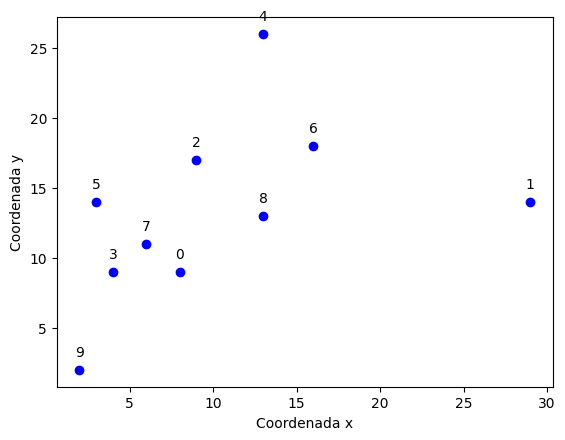

In [44]:
from funcoes_fera_10 import plota_cidades

CIDADES = {
    0: (8, 9),
    1: (29, 14),
    2: (9, 17),
    3: (4, 9),
    4: (13, 26),
    5: (3, 14),
    6: (16, 18),
    7: (6, 11),
    8: (13, 13),
    9: (2, 2),
}

plota_cidades(CIDADES)

Podemos gerar uma rota aleatória para visualizar uma possível resolução do problema.

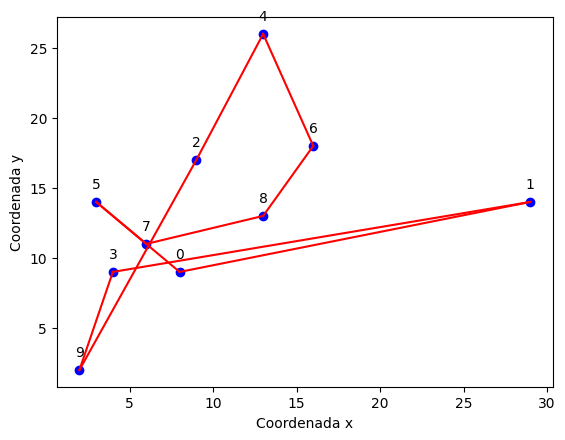

In [45]:
from funcoes_fera_10 import plota_trajeto
import random as rd

candidato = rd.sample(list(CIDADES.keys()), len(list(CIDADES.keys())))

plota_trajeto(CIDADES, candidato)

Agora sim podemos começar a trabalhar. Esse problema se assemelha muito ao problema do caixeiro viajante comum, já resolvido em aula. Por isso, podemos nos basear nele e apenas implementar algumas modificações. Dessa forma, um indivíduo será uma lista contendo os números referentes às cidades que o caixeiro irá visitar na ordem em que ele o fará. Assim, podemos reutilizar as funções: **funcao_objetivo_caixeiro**, **funcao_objetivo_pop_caixiro** e **selecao_torneio_min**.

Vamos, então, ao que precisamos mudar. Já que precisamos atribuir um número inteiro a cada cidade, devemos fazer uma pequena modificação na função **cria_cidades**. Para isso, criaremos a função **cria_cidades_impar**. Essa função receberá *n*, um número inteiro representando o número de cidades a serem geradas, *xy_minimo=0*, reepresentando o menor valor possível para as coordenadas (x, y), e *xy_maximo=300*, reepresentando o maior valor possível para as coordenadas (x, y). Podemos verificar o funcionamento dessa função na célula abaixo.

In [46]:
import random

def cria_cidades_impar(n, xy_minimo=0, xy_maximo=300):
    """Cria um dicionário aleatório de cidades com suas posições (x,y), com a chave do docionário sendo um número inteiro.

    Args:
      n: Número de cidades que serão visitadas pelo caixeiro.
      xy_minimo: Valor mínimo possível das coordenadas x e y.
      xy_maximo: Valor máximo possível das coordenadas x e y.

    """
    cidades = {}

    for i in range(n):
        cidades[i] = (
            random.randint(xy_minimo, xy_maximo),
            random.randint(xy_minimo, xy_maximo),
        )

    return cidades

print("Cidades geradas:")
cria_cidades_impar(10)

Cidades geradas:


{0: (118, 78),
 1: (170, 234),
 2: (158, 274),
 3: (289, 169),
 4: (273, 216),
 5: (119, 115),
 6: (38, 159),
 7: (189, 48),
 8: (98, 52),
 9: (147, 288)}

O enunciado diz, também, ser necessário que o caixeiro visite primeiro cidades ímpares, então um indivíduo só é válido se começar com 0, listar todas as cidades ímpares e, somente então, listar as cidades pares. A função **cria_candidato_caixeiro** não satisfaz essa restrição, então precisamos criar uma nova, que chamaremos **cria_candidato_caixeiro_impar**. Essa função recebe o dicionário de cidades (criado na função anterior), retira a cidades 0 (pois ela será a primeira em qualquer candidato) e embaralha as cidades, formando um caminho aleatório. Em seguida, na ordem em que aparecem, separa as cidades ímpares em uma lista e as cidades pares em outra. Por fim, cria o caminho final, começando com 0, adicionando as cidades ímpares e, por último, as cidades pares. Esse processo garante que o indivíduo será válido.

Como precisamos de mais de um indivíduo para a população, temos que fazer também a função **populacao_caixeiro_impar**, que simplesmente chama **cria_candidato_caixeiro_impar** um número de vezes igual ao tamanho da população estabelecido.

In [47]:
def cria_candidato_caixeiro_impar(cidades):
    """Sorteia um caminho possível no problema do caixeiro viajante que prefere cidades ímpares.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    
    caminho_0 = [0]

    cidades_menos0 = list(cidades.keys())
    cidades_menos0.remove(0)
    
    caminho_menos0 = random.sample(cidades_menos0, k=len(cidades_menos0))
    
    caminho_impar = [i for i in caminho_menos0 if i%2 != 0]
    caminho_par = [i for i in caminho_menos0 if i%2 == 0]
   
    caminho = caminho_0 + caminho_impar + caminho_par
    
    return caminho

def populacao_caixeiro_impar(tamanho_populacao, cidades):
    """Cria uma população no problema do caixeiro viajante que prefere cidades ímpares.

    Args:
      tamanho_populacao: tamanho da população.
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    populacao = []

    for _ in range(tamanho_populacao):
        populacao.append(cria_candidato_caixeiro_impar(cidades))

    return populacao

print("População:\n\n")

populacao = populacao_caixeiro_impar(10, cria_cidades_impar(10))
for n, individuo in enumerate(populacao):
    print(f"Indivíduo {n+1}: {individuo}\n")

População:


Indivíduo 1: [0, 3, 9, 7, 5, 1, 2, 4, 8, 6]

Indivíduo 2: [0, 5, 9, 7, 1, 3, 6, 2, 4, 8]

Indivíduo 3: [0, 5, 1, 3, 9, 7, 2, 4, 8, 6]

Indivíduo 4: [0, 5, 7, 9, 1, 3, 4, 2, 6, 8]

Indivíduo 5: [0, 3, 9, 1, 7, 5, 2, 4, 8, 6]

Indivíduo 6: [0, 7, 3, 5, 1, 9, 4, 2, 6, 8]

Indivíduo 7: [0, 5, 7, 9, 1, 3, 8, 6, 4, 2]

Indivíduo 8: [0, 5, 7, 3, 9, 1, 4, 6, 8, 2]

Indivíduo 9: [0, 1, 5, 9, 7, 3, 6, 4, 2, 8]

Indivíduo 10: [0, 3, 7, 1, 5, 9, 6, 8, 2, 4]



Outra função que precisaremos mudar, para garantir que não iremos gerar indivíduos inválidos, é a função de cruzamento. O que faremos, nesse caso, é apenas criar uma função intermediária que chamará a função de cruzamento ordenado, já feita em aula. Esse operador, basicamente, faz o cruzamento garantindo que não haverá elementos repetidos em um indivíduo. Precisamos certificar, porém, que o primeiro elemento continue sendo 0 e que pares e ímpares não se misturem.

Para isso, primeiro criamos a função **calc_min_idx_par**, que, ao receber o dicionário de cidades, retorna um inteiro representando o primeiro índice da lista que pode ser par (ou seja, elementos de índices menores devem ser 0 ou ímpares, enquanto elementos de índices maiores ou iguais devem ser pares). Então, criamos a função **cruzamento_ordenado_intervalos**, a qual realiza o cruzamento ordenado (usando a função **cruzamento_ordenado**) em intervalos, ou seja, primeiro cruza os elementos pares e depois os elementos ímpares (que descobre usando **calc_min_idx_par**). Depois de cruzar os intervalos separados, basta juntá-los para retornar os filhos.

In [59]:
def calc_min_idx_par(cidades):
    """Calcula o índice do dicionário a partir do qual todas as cidades são pares.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    min_idx_par = len(list(cidades.keys()))//2 + 1
    return min_idx_par


def cruzamento_ordenado(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado entre dois individuos

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    if random.random() < chance_de_cruzamento:
        tamanho_individuo = len(mae)

        # pontos de corte
        corte1 = random.randint(0, tamanho_individuo - 2)
        corte2 = random.randint(corte1 + 1, tamanho_individuo)

        # filho1
        filho1 = [None] * tamanho_individuo
        filho1[corte1:corte2] = mae[corte1:corte2]
        pai_ = pai[corte2:] + pai[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in pai_:
            if valor not in filho1:
                filho1[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        # filho2
        filho2 = [None] * tamanho_individuo
        filho2[corte1:corte2] = pai[corte1:corte2]
        mae_ = mae[corte2:] + mae[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in mae_:
            if valor not in filho2:
                filho2[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        return filho1, filho2
    else:
        return pai, mae


def cruzamento_ordenado_intervalos(pai, mae, chance_de_cruzamento, cidades):
    """Cruzamento ordenado entre dois individuos dividido em dois intervalos (ímpares e pares) para o problema do caixeiro viajante que prefere cidades ímpares.
 
    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.
 
    """
    if random.random() < chance_de_cruzamento:
        min_idx_par = calc_min_idx_par(cidades)
 
        mae_impar = mae[1:min_idx_par]
        pai_impar = pai[1:min_idx_par]
 
        mae_par = mae[min_idx_par:]
        pai_par = pai[min_idx_par:]
 
        filho1_impar, filho2_impar = cruzamento_ordenado(pai_impar, mae_impar, 1)
        filho1_par, filho2_par = cruzamento_ordenado(pai_par, mae_par, 1)
 
        filho1 = [0] + filho1_impar + filho1_par
        filho2 = [0] + filho2_impar + filho2_par
        
        return filho1, filho2
    else:
        return pai, mae
    
cidades = cria_cidades_impar(10)
    
pai = cria_candidato_caixeiro_impar(cidades)
mae = cria_candidato_caixeiro_impar(cidades)

filho1, filho2 = cruzamento_ordenado_intervalos(pai, mae, 1, cidades)

print(f"Pai: {pai}")
print(f"Mae: {mae}")
print()
print(f"Filho 1: {filho1}")
print(f"Filho 2: {filho2}")

Pai: [0, 1, 7, 3, 5, 9, 6, 4, 2, 8]
Mae: [0, 7, 1, 9, 5, 3, 8, 4, 6, 2]

Filho 1: [0, 7, 3, 9, 5, 1, 4, 8, 6, 2]
Filho 2: [0, 1, 9, 3, 5, 7, 4, 6, 2, 8]


Por fim, criamos a função **mutacao_troca_cx_impar** para fazer a mutação dos indivíduos. Ela é baseada no operador de mutação de troca, que troca a posição de dois elementos de um indivíduo. A diferença desse é que ele confere se o elemento escolhido é par ou ímpara e garante que o outro elemento seja da mesma paridade (e nunca escolhe 0).

In [49]:
def mutacao_troca_cx_impar(populacao, chance_de_mutacao, cidades):
    """Aplica mutacao de troca em um indivíduo no problema do caixeiro viajante que prefere cidades ímpares.

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.
    """
    
    min_idx_par = calc_min_idx_par(cidades)
    
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene1 = random.randint(1, len(individuo) - 1)
            if gene1 < min_idx_par:
                gene2 = random.randint(1, min_idx_par - 1)
            else:
                gene2 = random.randint(min_idx_par, len(individuo) - 1)
                
            while gene1 == gene2:
                gene1 = random.randint(1, len(individuo) - 1)
                gene2 = random.randint(1, len(individuo) - 1)
                
                if gene1 < min_idx_par:
                    gene2 = random.randint(1, min_idx_par - 1)
                else:
                    gene2 = random.randint(min_idx_par, len(individuo) - 1)

            individuo[gene1], individuo[gene2] = (
                individuo[gene2],
                individuo[gene1],
            )

In [50]:
from functools import partial
from itertools import permutations

from funcoes_fera_10 import cria_cidades_impar as cria_cidades
from funcoes_fera_10 import populacao_caixeiro_impar as cria_populacao
from funcoes_fera_10 import funcao_objetivo_pop_caixeiro
from funcoes_fera_10 import funcao_objetivo_caixeiro
from funcoes_fera_10 import selecao_torneio_min as funcao_selecao
from funcoes_fera_10 import cruzamento_ordenado_intervalos
from funcoes_fera_10 import mutacao_troca_cx_impar

In [51]:
NUM_CIDADES = 15
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [52]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
# pprint(populacao)
# funcao_objetivo(populacao, CIDADES)

In [53]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)
funcao_cruzamento = partial(cruzamento_ordenado_intervalos, cidades=CIDADES)
funcao_mutacao = partial(mutacao_troca_cx_impar, cidades=CIDADES)

In [54]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
[0, 7, 3, 5, 11, 13, 9, 1, 14, 10, 12, 8, 2, 4, 6] com distância: 1316.266222473146



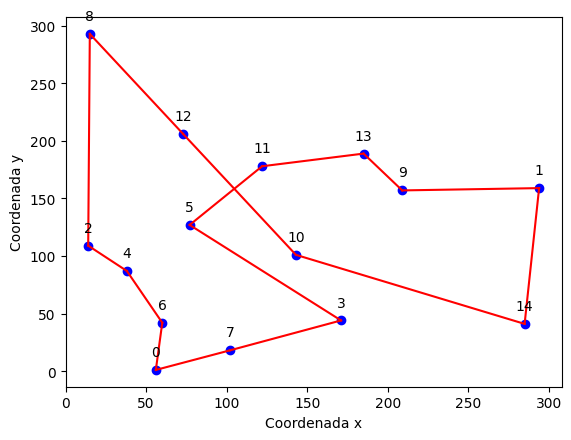

In [55]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)


Melhor individuo obtido por busca exaustiva:
[0, 7, 3, 5, 11, 13, 9, 1, 14, 10, 12, 8, 2, 4, 6] com distância: 1316.266222473146



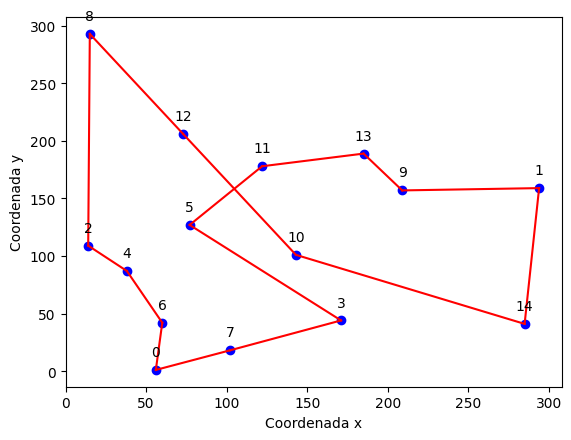

In [56]:
idx_sem_0 = list(CIDADES.keys())
idx_sem_0.remove(0)

idx_par = [i for i in idx_sem_0 if i%2 == 0]
idx_impar = [i for i in idx_sem_0 if i%2 != 0]

if True:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho_impar in permutations(idx_impar):
        for caminho_par in permutations(idx_par):
            caminho = [0] + list(caminho_impar) + list(caminho_par)
            distancia = funcao_objetivo_caixeiro(caminho, CIDADES)
            if distancia < fitness_otimo:
                fitness_otimo = distancia
                resposta_otima = caminho
                melhor_distancia = distancia

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_trajeto(CIDADES, resposta_otima)